## Load libraries

In [2]:
# tensorflow backend
print('tensorflow backend')
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
print('vae stuff')
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
# import scientific py
print('iport scientific py')
import numpy as np
import pandas as pd
# rdkit stuff
print('rdkit stuff')
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
print('plotting stuff')
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

tensorflow backend
vae stuff


Using TensorFlow backend.
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packag

iport scientific py
rdkit stuff
plotting stuff


## Load a model

In [3]:
vae = VAEUtils(directory='models/zinc_properties')

From C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\backend\tensorflow_backend.py:1210: calling reduce_prod (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\models.py:245: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
From C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\backend\tensorflow_backend.py:1192: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
From C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\backend\tensorflow_backend.py:1156: calling reduce_max (from tensorflow.python.ops.mat

Using standarized functions? True
Standarization: estimating mu and std values ...done!


## Decode / Encode

In [12]:
smiles_1 = mu.canon_smiles('c1ccccc1')

X_1 = vae.smiles_to_hot(smiles_1,canonize_smiles=True)
z_1 = vae.encode(X_1)
X_r= vae.decode(z_1)

print('{:20s} : {}'.format('Input',smiles_1))
print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))
print('{:20s} : {} with norm {:.3f}'.format('Z representation',z_1.shape, np.linalg.norm(z_1)))
# print(z_1)

Input                : c1ccccc1
Reconstruction       : Fc1ccccc1OCOC(
Z representation     : (1, 196) with norm 12.216
[[-0.77691247  0.85882807 -0.44760311  1.42539011  0.01080741  0.47623664
  -1.79404222 -0.25234241  1.29972129 -1.25165935  0.46670776 -0.66059132
   0.31917993 -1.27116825 -1.71836215  0.33949863 -0.55761879 -0.11884767
   1.28282011 -1.07083934 -0.22369312 -0.12928893 -0.57709073  0.97884067
  -0.10821222  0.74964477 -0.58405038 -0.36507275  0.75152057  0.93259306
  -0.83165664 -0.5486327   0.55401731  0.58158805 -0.32189768 -1.64018346
   0.04432136 -0.32907026 -1.60355907 -0.32513311 -1.69003329 -0.65187205
   0.78100092  0.72093741  0.91144383  0.5166204   0.09846786 -0.29645276
   2.71204159  1.38990597 -1.06040201  0.23293988  0.05963608 -0.35245194
  -0.0862902   1.80864847  0.47366582  0.05502738 -0.04904005 -0.98173224
   2.5358746  -0.56289267 -0.36588563 -0.58572402 -0.77610435  0.89394072
  -0.91692297  1.47423123 -1.44693552 -0.73632022  0.82211355 -0.22

## property predictor

In [1]:
print('Properties (qed,SAS,logP):')
y_1 = vae.predict_prop_Z(z_1)
print(y_1)

Properties (qed,SAS,logP):


NameError: name 'vae' is not defined

## Decode several attempts

Searching molecules randomly sampled from 4.00 std (z-distance) from the point
Found 20 unique mols, out of 47
SMILES
 0               Fc1ccccc1
1               Oc1ccccc1
2              Fc1ccccc1F
3              Oc1ccccc1F
4             Oc1ccccc1CO
5        Fc1ccccc1OC/COCl
6          Fc1ccccc1OCOCl
7       Fc1ccccc1OCOC(F)F
8          Oc1ccccc1OCOCl
9        Fc1ccccc1OCOC/Cl
10        Oc1ccccc1COCOCl
11     Fc1ccccc1OCOC(F)Cl
12              C1cccccc1
13    Oc1ccccc1OCOC(F)OCl
14       C1cccccc1COC(F)F
15        Fc1ccccc1OCOCOC
16      Fc1ccccc1OCOC(F)O
17      C1cccccc1OCOC(F)O
18     Oc1ccccc1OCOC(F)=O
19             C1cccccc1F
Name: smiles, dtype: object


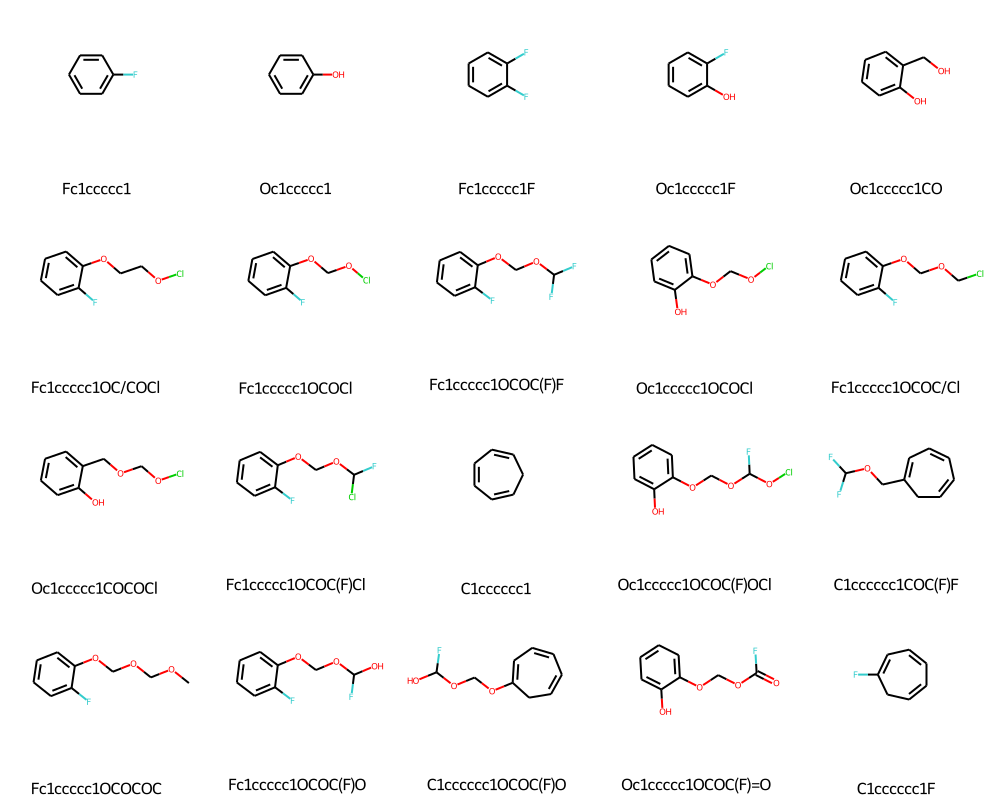

,smiles,distance,count,frequency,mol
0,Fc1ccccc1,3.462863,18,0.382979,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,Oc1ccccc1,3.933223,3,0.063830,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,Fc1ccccc1F,5.723780,1,0.021277,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,Oc1ccccc1F,6.223204,1,0.021277,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,Oc1ccccc1CO,6.590161,1,0.021277,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [30]:
noise=4.0
print('Searching molecules randomly sampled from {:.2f} std (z-distance) from the point'.format(noise))
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
df.head()